In [1]:
#import essentials
import pandas as pd
import numpy as np

from analysis_preprocess import checkcorrelation, checkmissing, checkallcatvaluecounts, PrincipalComponentAnalysis, MultipleCorrespondenceAnalysis, outliersearch

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

data = pd.read_csv('train.csv')

C:\Windows\Temp\ipykernel_16580\2131965479.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# EDA(Exploratory Data Analysis)

In [2]:
    print(data.info())
    print("=====================================")
    print("Number of rows:")
    print(len(data))
    print("=====================================")
    print("Number if unique id:")
    print(data['Id'].nunique())
    print("=====================================")
    print("Number of unique houses:")
    print(len(data.drop(['Id','SalePrice','SaleCondition','SaleType'],axis = 1).drop_duplicates()))
    print("=====================================")
    print(data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

All of the records are unique despite dropping SalePrice, SaleCondition, and SaleType to specifically look at the characteristics of the house. 

This means, no house is the same with one and another.

From the .info(), we notice that some attributes have very large missing values. To understand the intuition behind these missing values, we need to separate them first by the data types (e.g., numeric vs categorical) to ease our work

In [3]:
#Before continuing, drop "Id" since it is an irrelevant column
data.drop(columns = ['Id'],inplace = True)

# Exploring Numerical Variables (and categorical variables along the way)

We need to see the missing values present in the numeric variables

In [4]:
numofmv = data.select_dtypes(exclude = 'object').isnull().sum()/len(data)
print('Columns that has missing values:\n{}'.format(numofmv[numofmv>0]))

#print('Columns that has large missing values:\n{}'.format(numofmv[numofmv>0.3].sort_values(ascending=False)))

Columns that has missing values:
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64


it seems that there are 3 numerical variables that has missing values.

#### Checking lotfrontage

In [5]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [6]:
#on what conditions does lotfrontage has missing value
data[data['LotFrontage'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7             60       RL          NaN    10382   Pave   NaN      IR1   
12            20       RL          NaN    12968   Pave   NaN      IR2   
14            20       RL          NaN    10920   Pave   NaN      IR1   
16            20       RL          NaN    11241   Pave   NaN      IR1   
24            20       RL          NaN     8246   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1429          20       RL          NaN    12546   Pave   NaN      IR1   
1431         120       RL          NaN     4928   Pave   NaN      IR1   
1441         120       RM          NaN     4426   Pave   NaN      Reg   
1443          30       RL          NaN     8854   Pave   NaN      Reg   
1446          20       RL          NaN    26142   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
7            Lvl    AllPub    Corner  ...        0    NaN    NaN        Shed   
12           Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
14           Lvl    AllPub    Corner  ...        0    NaN   GdWo         NaN   
16           Lvl    AllPub   CulDSac  ...        0    NaN    NaN        Shed   
24           Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1429         Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
1431         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1441         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1443         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1446         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
7        350     11    2009        WD         Normal     200000  
12         0      9    2008        WD         Normal     144000  
14         0      5    2008        WD         Normal     157000  
16       700      3    2010        WD         Normal     149000  
24         0      5    2010        WD         Normal     154000  
...      ...    ...     ...       ...            ...        ...  
1429       0      4    2007        WD         Normal     182900  
1431       0     10    2009        WD         Normal     143750  
1441       0      5    2008        WD         Normal     149300  
1443       0      5    2009        WD         Normal     121000  
1446       0      4    2010        WD         Normal     157900  

[259 rows x 80 columns]

In [7]:
#anything in common when LotFrontage is NA?
commonfeature = data[data['LotFrontage'].isna()].nunique()
commonfeature[commonfeature == 1]

PoolQC    1
dtype: int64

In [8]:
data[data['LotFrontage'].isna()][['LotFrontage','PoolQC','PoolArea']]

LotFrontage PoolQC  PoolArea
7             NaN    NaN         0
12            NaN    NaN         0
14            NaN    NaN         0
16            NaN    NaN         0
24            NaN    NaN         0
...           ...    ...       ...
1429          NaN    NaN         0
1431          NaN    NaN         0
1441          NaN    NaN         0
1443          NaN    NaN         0
1446          NaN    NaN         0

[259 rows x 3 columns]

In [9]:
data['Neighborhood'].isnull().sum()

0

It shows that only value from "PoolQC" feature is static when LotFrontage is missing. PoolQC is NaN when there is no pool in the house. But, it does not make sense because the availability of the pool does not affect distance from street. It's not possible to drop these values since in the future we might encounter these missing values again. 

Since we have data about the style of the house of the area that the house is located, we can try to fill the missing values by the neigborhood median. This intuition is driven by the condition of the landscape of each neighborhood. For example, depending on the landscape, houses in 강남 versus houses in 청량리 will have a difference of "house to street" distance. Part of it is due to the neighborhood landscape, condition, etc.

In [10]:
LFneighborhood = data.groupby('Neighborhood')['LotFrontage'].median().to_dict()
data['LotFrontage'] = data.apply(lambda row: LFneighborhood[row['Neighborhood']] if np.isnan(row['LotFrontage']) else row['LotFrontage'], axis=1)

#### Checking MasVnrArea

MasVnrArea is directly dependent with MasVnrType. Could it be that missing MasVnrArea means no masonry veneer available?

In [11]:
print("Does empty MasVnrArea means no masonry veneer available?")
display(data[data['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']])
print("number of empty space but type is not None: {}".format(len(data[data['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']])))
print("Does empty MasVnrType means no space reserved for masonry veneer?")
display(data[(data['MasVnrType'].isna()) & (data['MasVnrArea'] > 0)][['MasVnrType','MasVnrArea']])
print("number of empty type but has space: {}".format(len(data[(data['MasVnrType'].isna()) & (data['MasVnrArea'] > 0)][['MasVnrType','MasVnrArea']])))

Does empty MasVnrArea means no masonry veneer available?


MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN

number of empty space but type is not None: 8
Does empty MasVnrType means no space reserved for masonry veneer?


MasVnrType  MasVnrArea
624         NaN       288.0
773         NaN         1.0
1230        NaN         1.0
1300        NaN       344.0
1334        NaN       312.0

number of empty type but has space: 5


The first statement shows that when the Area is not available, there's a tendency that the type is also not known. As for the other way around, in my opinion we can also try to impute it with the mode of the data.

In [12]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data.loc[(data['MasVnrType'].isna()) & (data['MasVnrArea'] > 0), 'MasVnrType'] = data['MasVnrType'].mode()[0]
data['MasVnrType'] = data['MasVnrType'].fillna("None")

In [13]:
#sanity check
data.loc[(data['MasVnrType'] == 'None') & (data['MasVnrArea'] > 0), 'MasVnrType'] 

Series([], Name: MasVnrType, dtype: object)

#### Checking GarageYrBlt    

GarageYrBlt is directly associated with the availability of the garage. Let's check that first

In [14]:
print('Check Data')
print('The length of data when GarageYrBlt is empty = the length of data when both GarageYrBlt and GarageType are empty:')
EmptyGarageYear = len(data[data['GarageYrBlt'].isna()][['GarageYrBlt','GarageType']])
EmptyGarageYear_GarageType = len(data[(data['GarageYrBlt'].isna())&(data['GarageType'].isna())][['GarageYrBlt','GarageType']])
print(EmptyGarageYear == EmptyGarageYear_GarageType)

Check Data
The length of data when GarageYrBlt is empty = the length of data when both GarageYrBlt and GarageType are empty:
True


It seems that GarageYear is only not available when there is no Garage. Let's impute this with zero.

In [15]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

#### Additional note on MSSubClass

If we observe MSSubClass, it is more similar to categorical variable than numerical variable. Convert this into str and then to object type.

In [16]:
data['MSSubClass'] = data['MSSubClass'].astype('str').astype('object')

#### Outlier Analysis

After watching the reference Ineeji gave, it is shown that Ensemble model gives good result. Within the ensemble model, we can see that some of them are distance-based learner. Due to this, it is more better if we remove the outliers exist in the training data. Tree-based learners are generally not sensitive to outliers while distance-based learners are often affected since decisions are made by distance between datapoints.

In [17]:
#Check number of columns
data.select_dtypes(exclude = 'object').drop(columns = ['SalePrice']).shape

(1460, 35)

In [18]:
#Eliminate outliers with iterative IQR
# consider as an outlier if outlier exists in at least 3 columns
outlier_index = outliersearch(data.select_dtypes(exclude = 'object').drop(columns = ['SalePrice']), threshold = 3)
len(outlier_index)

68

The number of outliers dropped depends on the number of columns that becomes the threshold. Supposedly if we want to delete when any outlier is detected, we can set the threshold to 1. Since the number of outlier detected is not a lot, try to reduce threshold to 1

In [19]:
outlier_index = outliersearch(data.select_dtypes(exclude = 'object').drop(columns = ['SalePrice']), threshold = 1)
len(outlier_index)

410

Our training data is reduced to just around 1000. This is still okay since I planned to train the model using stacked CV

In [20]:
data.drop(index = outlier_index, inplace = True)

#### Correlation and Engineering

I do feature engineering referring to the reference that Ineeji gave to me.

In [21]:
####in this phase will do engineering for numerical variables

#add more weight if the building has been remodel, especially if it's recently remodeled
data['YrBltAndRemod']=data['YearBuilt']+data['YearRemodAdd']

#captures the feeling of spaciness in the house
data['TotalSF']=data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] +
                                 data['1stFlrSF'] + data['2ndFlrSF'])
data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'] +
                              data['WoodDeckSF'])
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))



In [22]:
data.select_dtypes(exclude = 'object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 0 to 1456
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LotFrontage        1050 non-null   float64
 1   LotArea            1050 non-null   int64  
 2   OverallQual        1050 non-null   int64  
 3   OverallCond        1050 non-null   int64  
 4   YearBuilt          1050 non-null   int64  
 5   YearRemodAdd       1050 non-null   int64  
 6   MasVnrArea         1050 non-null   float64
 7   BsmtFinSF1         1050 non-null   int64  
 8   BsmtFinSF2         1050 non-null   int64  
 9   BsmtUnfSF          1050 non-null   int64  
 10  TotalBsmtSF        1050 non-null   int64  
 11  1stFlrSF           1050 non-null   int64  
 12  2ndFlrSF           1050 non-null   int64  
 13  LowQualFinSF       1050 non-null   int64  
 14  GrLivArea          1050 non-null   int64  
 15  BsmtFullBath       1050 non-null   int64  
 16  BsmtHalfBath       1050 non-n

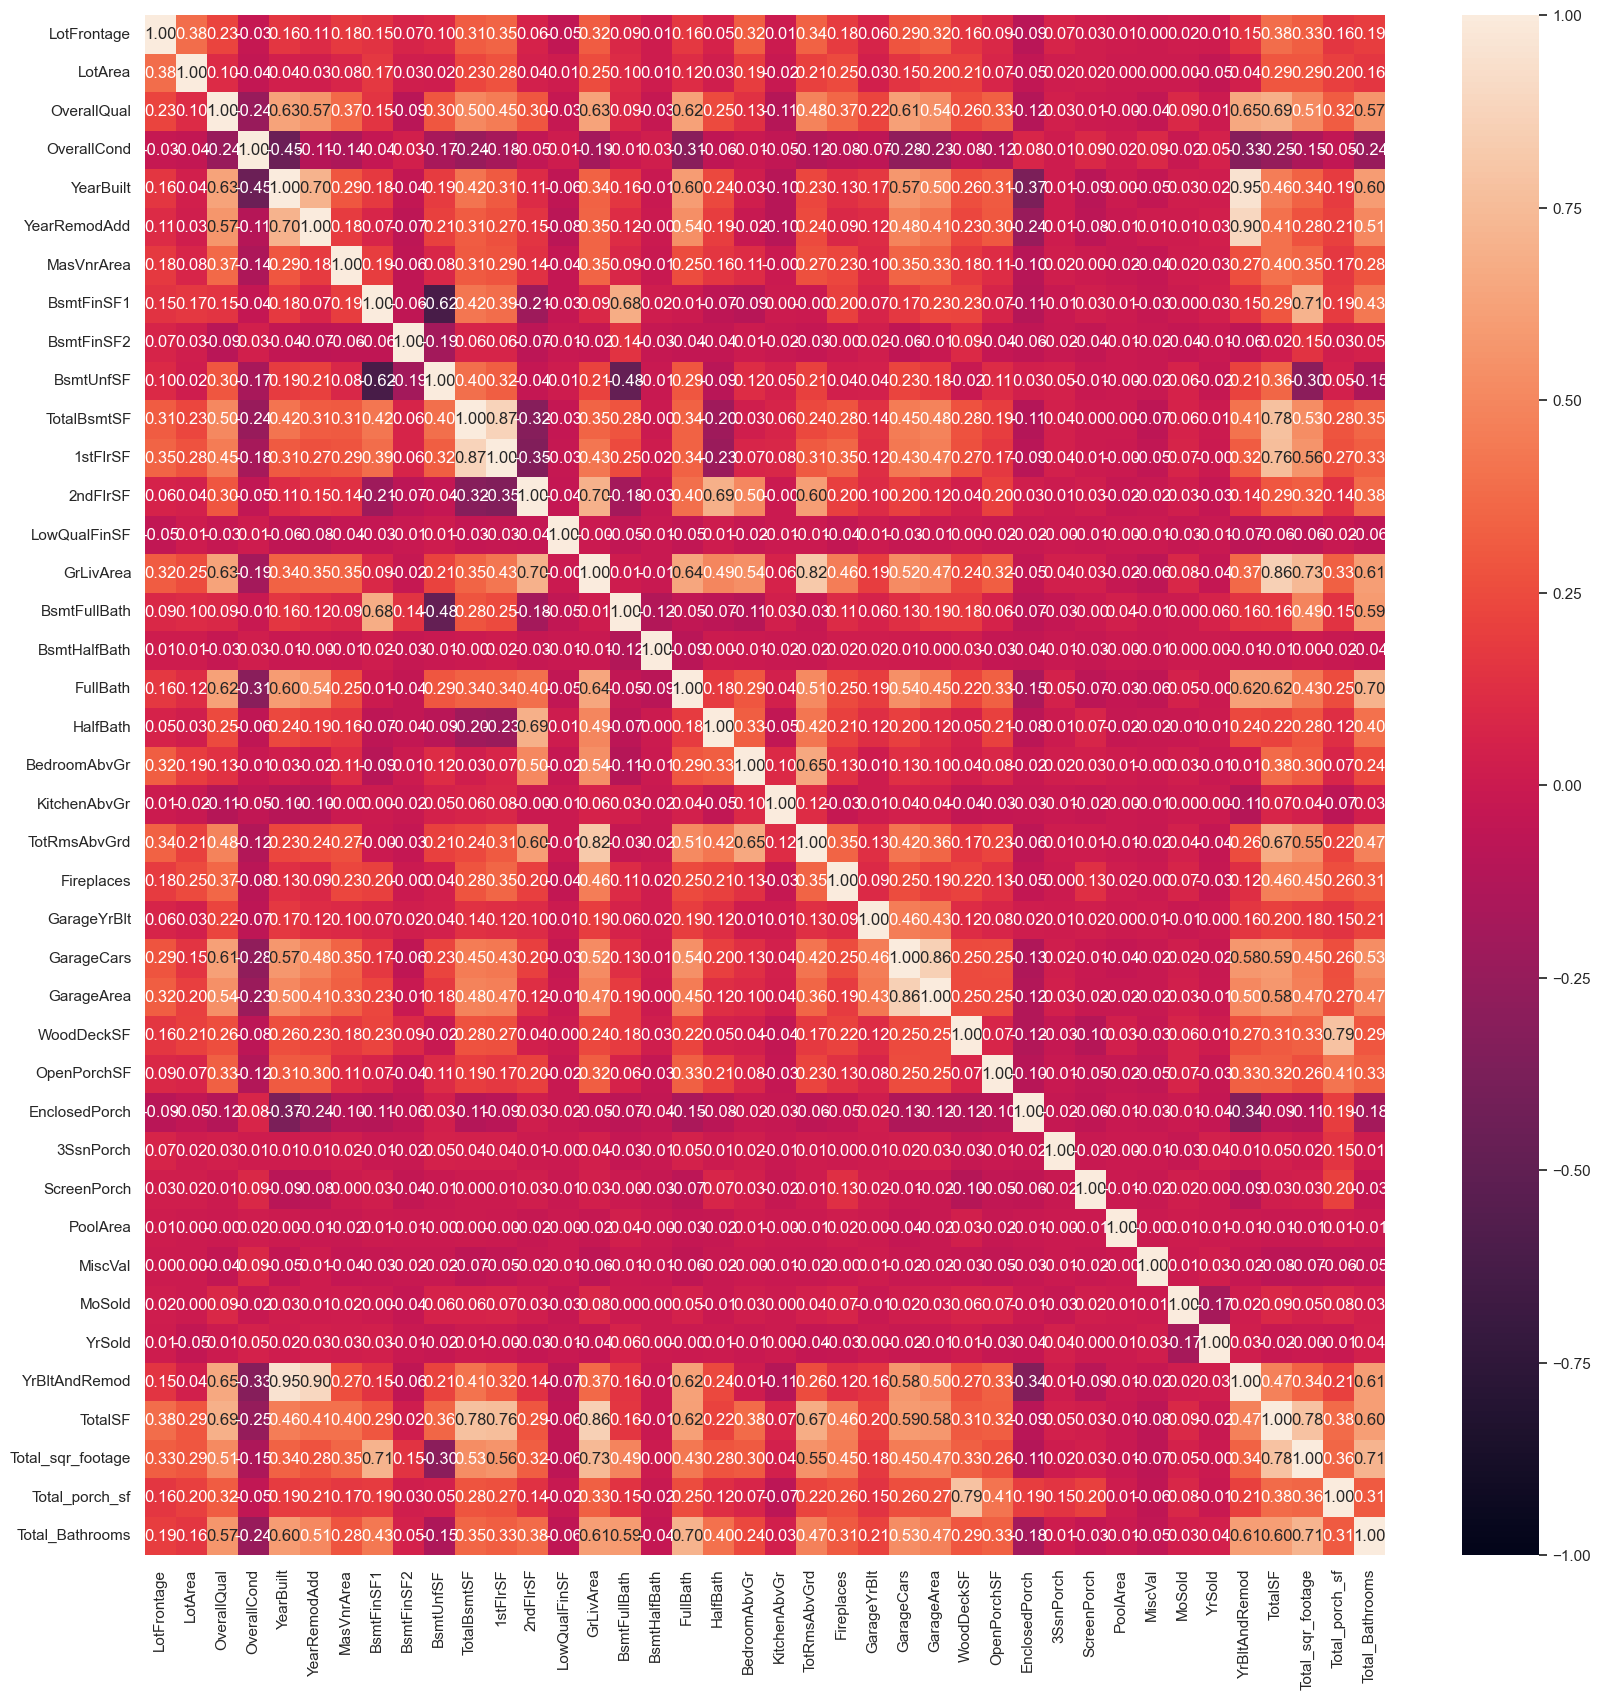

In [23]:
#Check for correlations
checkcorrelation(data.select_dtypes(exclude = 'object').drop("SalePrice",axis = 1))

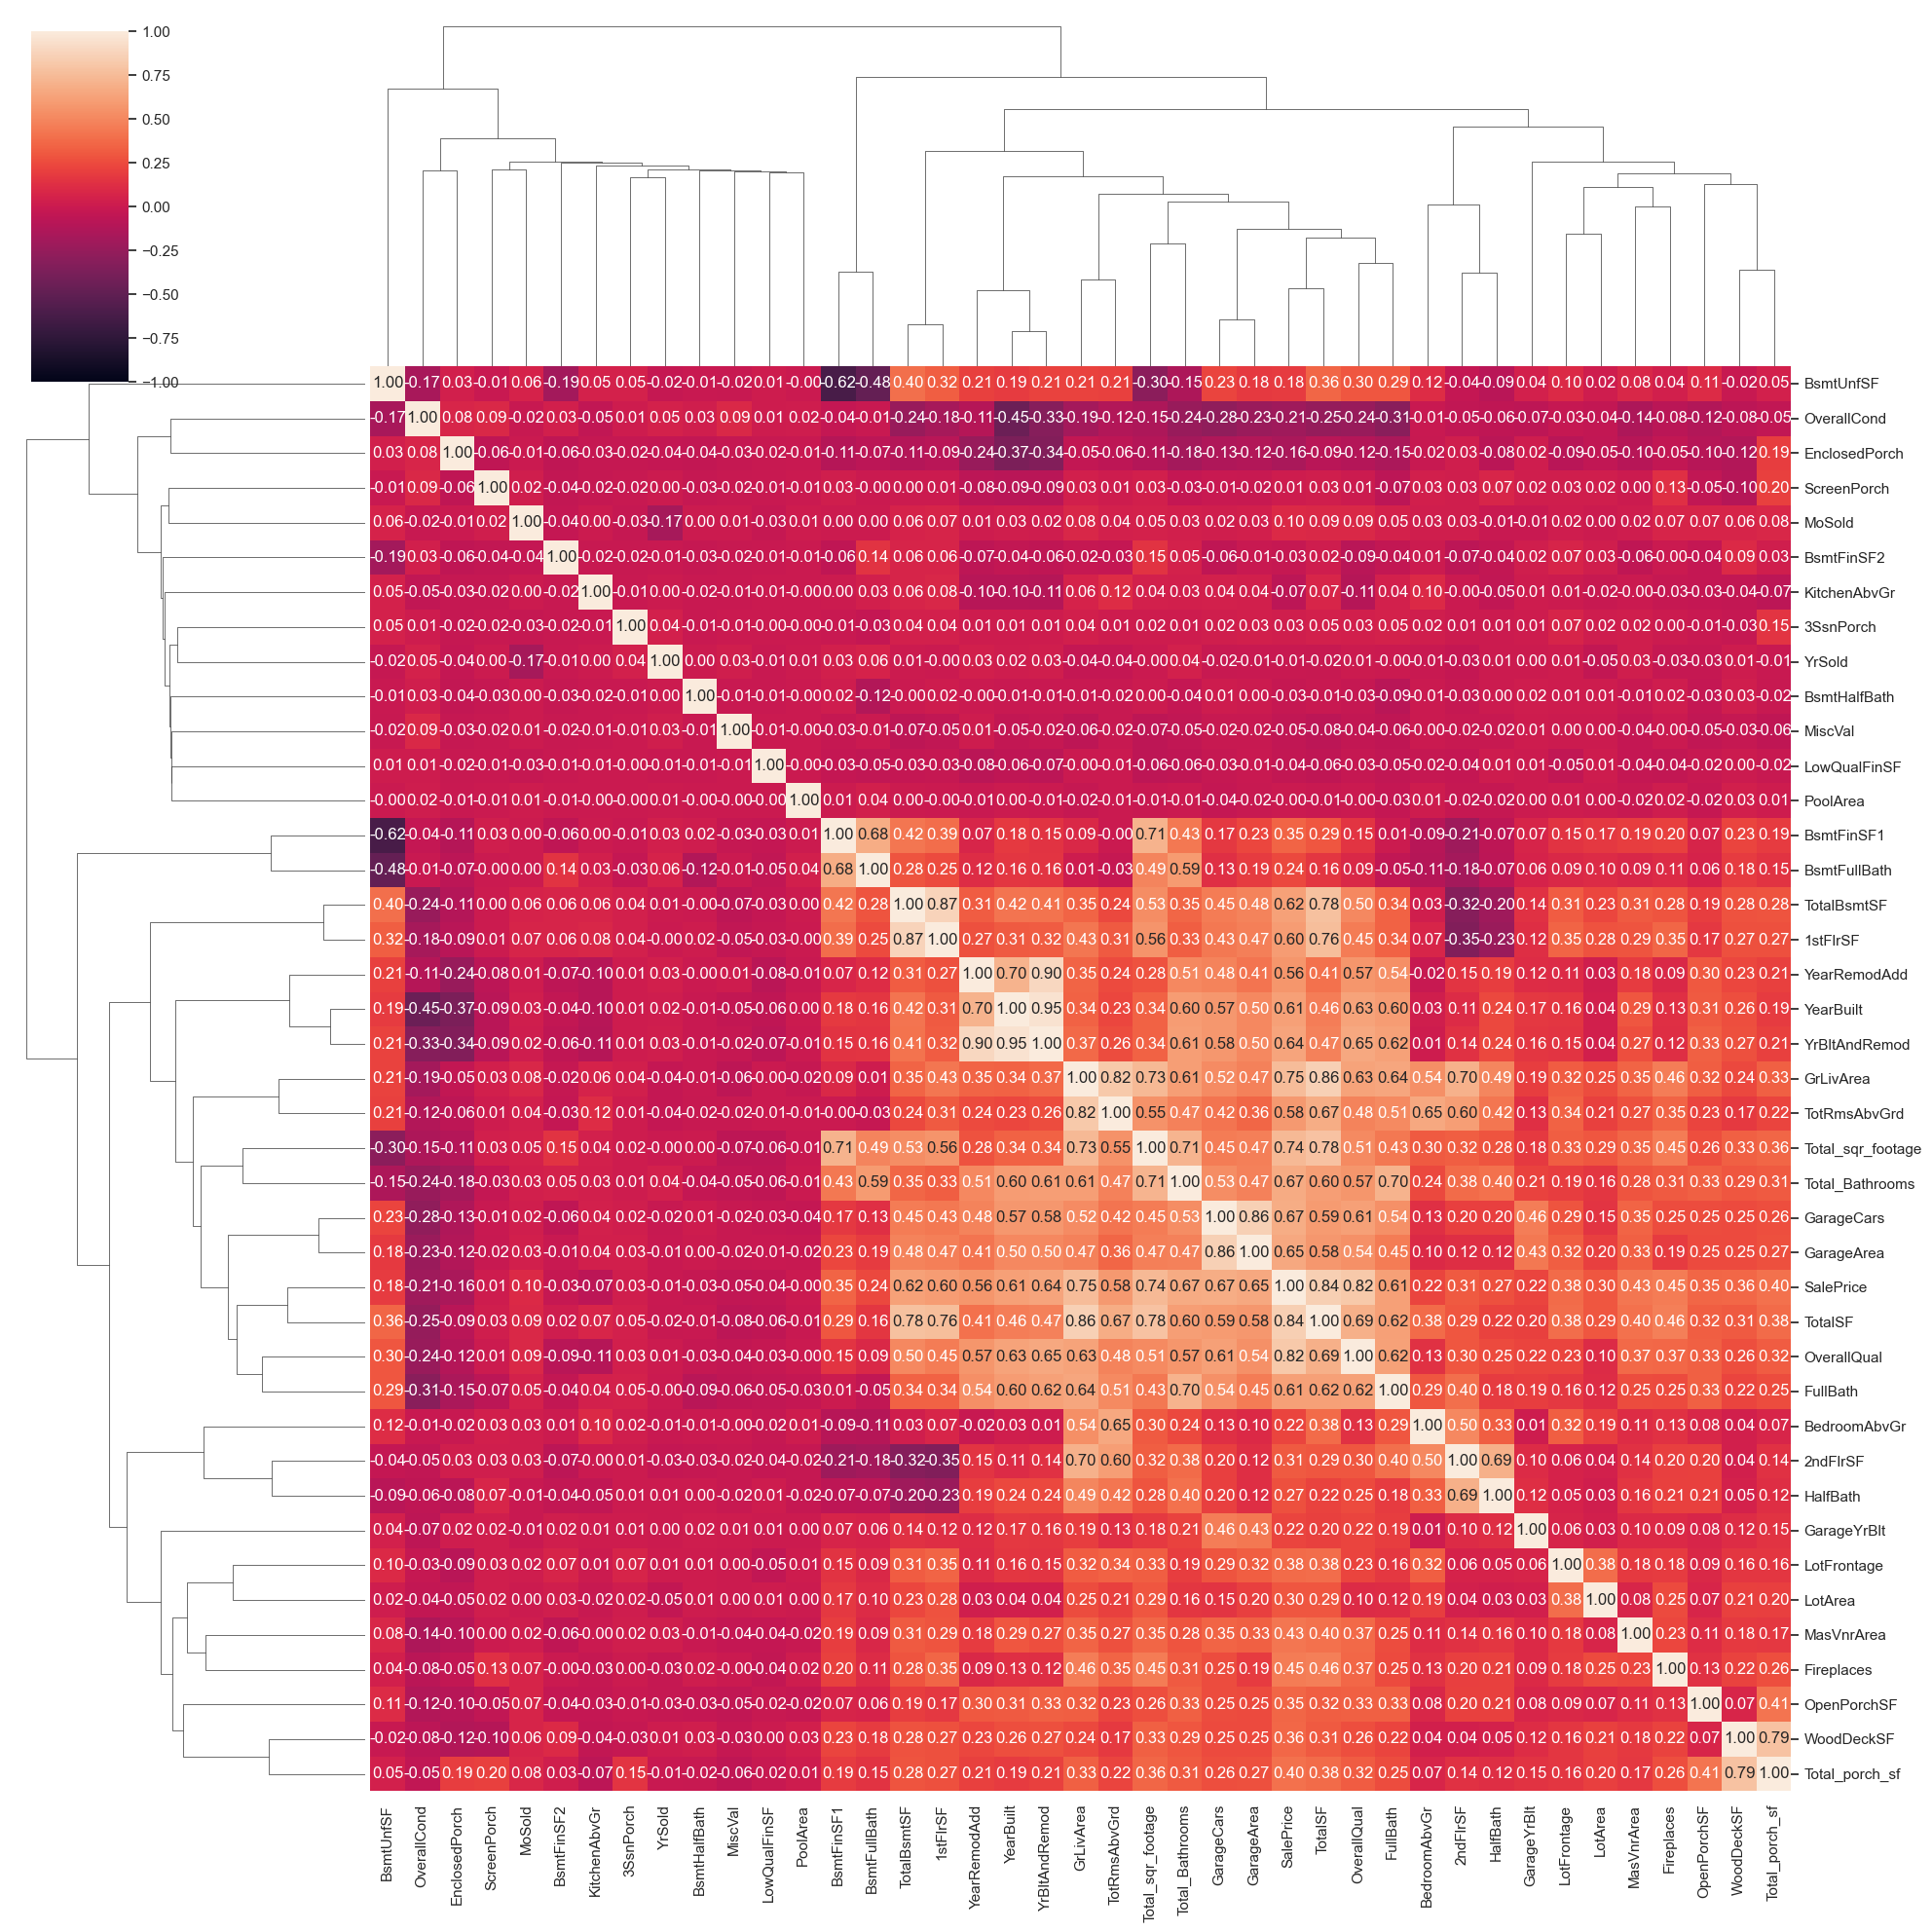

In [24]:
checkcorrelation(data.select_dtypes(exclude = 'object'), cluster = True)

In [25]:
checkcorrelation(data.select_dtypes(exclude = 'object'), target='SalePrice')

                   SalePrice
SalePrice           1.000000
TotalSF             0.844618
OverallQual         0.815653
GrLivArea           0.753243
Total_sqr_footage   0.740646
GarageCars          0.674387
Total_Bathrooms     0.668460
GarageArea          0.649985
YrBltAndRemod       0.638341
TotalBsmtSF         0.623517
FullBath            0.614755
YearBuilt           0.610342
1stFlrSF            0.600742
TotRmsAbvGrd        0.584393
YearRemodAdd        0.563327
Fireplaces          0.445448
MasVnrArea          0.425262
Total_porch_sf      0.401604
LotFrontage         0.376933
WoodDeckSF          0.361897
OpenPorchSF         0.354328
BsmtFinSF1          0.350130
2ndFlrSF            0.309501
LotArea             0.296332
HalfBath            0.272777
BsmtFullBath        0.240824
GarageYrBlt         0.222353
BedroomAbvGr        0.219325
BsmtUnfSF           0.181434
MoSold              0.101520
3SsnPorch           0.030888
ScreenPorch         0.012418
PoolArea           -0.003393
YrSold        

We see from correlation analysis that a lot of the numerical features are correlated. With this in mind, we can do PCA for numerical variables

#### PCA for numerical variables

[0.24046808 0.32202953 0.39131053 0.45030983 0.49037131 0.52365226
 0.55534374 0.58523573 0.61428805 0.64102123 0.66700652 0.69249695
 0.71770275 0.74280949 0.76765506 0.79132306 0.81457287 0.835969
 0.85590226 0.87557255 0.89403912 0.91010682 0.92422589 0.93722348
 0.94940856 0.96059934 0.97000644 0.97769724 0.98480061 0.99002814
 0.9939063  0.99708457 1.         1.         1.         1.
 1.         1.         1.         1.        ]


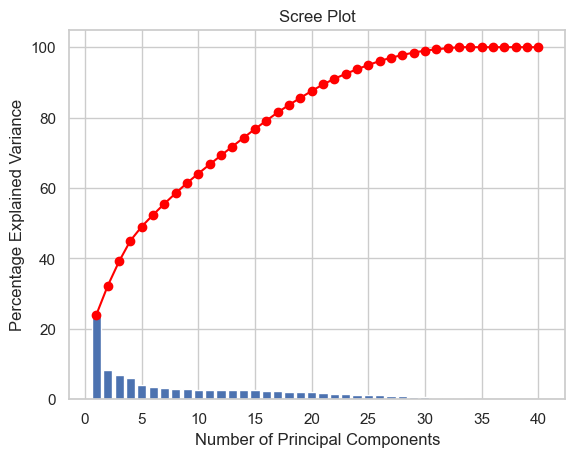

Number of Principal Components that explains 85% of variance:
19
Loadings:
                       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  \
LotFrontage        0.128259  0.024103  0.116105  0.206113  0.101023  0.058733   
LotArea            0.093313  0.051347  0.172297  0.181631 -0.022578  0.105699   
OverallQual        0.256816 -0.035229 -0.126737 -0.011111 -0.054447 -0.000214   
OverallCond       -0.104941 -0.009414  0.164663  0.020848 -0.105488 -0.026537   
YearBuilt          0.225458  0.050017 -0.287657 -0.226222  0.034265  0.111358   
YearRemodAdd       0.196826  0.010095 -0.276445 -0.209808 -0.052886  0.131108   
MasVnrArea         0.147042  0.014920  0.013969  0.031767  0.048721 -0.073654   
BsmtFinSF1         0.108480  0.367501  0.275737 -0.172235  0.095409 -0.017033   
BsmtFinSF2        -0.002593  0.085177  0.111578 -0.015529  0.014699  0.078894   
BsmtUnfSF          0.066782 -0.156731 -0.370426  0.407595 -0.037574  0.052215   
TotalBsmtSF        0.207787  0.278

In [26]:
PCA = PrincipalComponentAnalysis()
PCA.explain(data.select_dtypes(exclude='object').drop(columns=['SalePrice']))

In [27]:
data.select_dtypes(exclude='object').drop(columns = ['SalePrice']).shape[1]

40

With this, we can reduce the numeric variables from 40 variables to just 19

In [28]:
#This is for preprocessing later
#numeric = PCA.do(data.select_dtypes(exclude='object').drop(columns=['SalePrice']), n_components = 20, mode = 'train')
#numericcol = data.select_dtypes(exclude='object').drop(columns = ['SalePrice']).columns
#data = data.drop(columns = numericcol)
#data = pd.concat([data,numeric],axis = 1)
#data.info()

# Handling Categorical Variables

There are a lot of variables here that are categorical. Since there is a lot of them, first we can try to see which variables have a high missing value count. After that, we can try to remove variables that are greatly imbalanced since it will not help much during model inference due to lack of variance. Third, if the number of variables are still huge, we can reduce them using MCA.

First, select variables that are not considered in numerical data

In [29]:
data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 0 to 1456
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1050 non-null   object
 1   MSZoning       1050 non-null   object
 2   Street         1050 non-null   object
 3   Alley          56 non-null     object
 4   LotShape       1050 non-null   object
 5   LandContour    1050 non-null   object
 6   Utilities      1050 non-null   object
 7   LotConfig      1050 non-null   object
 8   LandSlope      1050 non-null   object
 9   Neighborhood   1050 non-null   object
 10  Condition1     1050 non-null   object
 11  Condition2     1050 non-null   object
 12  BldgType       1050 non-null   object
 13  HouseStyle     1050 non-null   object
 14  RoofStyle      1050 non-null   object
 15  RoofMatl       1050 non-null   object
 16  Exterior1st    1050 non-null   object
 17  Exterior2nd    1050 non-null   object
 18  MasVnrType     1050 non-null   ob

In [30]:
checkmissing(data.select_dtypes(include=['object']), threshold = 0.3)

Columns that has missing values:
Alley           0.946667
BsmtQual        0.009524
BsmtCond        0.009524
BsmtExposure    0.010476
BsmtFinType1    0.009524
BsmtFinType2    0.009524
Electrical      0.000952
FireplaceQu     0.477143
GarageType      0.021905
GarageFinish    0.021905
GarageQual      0.021905
GarageCond      0.021905
PoolQC          0.999048
Fence           0.817143
MiscFeature     0.985714
dtype: float64
Columns that has large missing values:
PoolQC         0.999048
MiscFeature    0.985714
Alley          0.946667
Fence          0.817143
FireplaceQu    0.477143
dtype: float64


Immediately dropped (PoolQC, MiscFeature, Alley, Fence). Because even if we have them imputed, most of the value will be the same. They do not give much information.

In [31]:
data.drop(columns = ['PoolQC','MiscFeature','Alley','Fence'], axis = 1, inplace = True)

#### Categorical variables with high cardinality

Generally, categorical variables with high cardinality are dropped. Here, I don't dropped it because eventually we will use MCA.

#### Evaluate count on variables left

In [32]:
checkallcatvaluecounts(data.select_dtypes(include=['object']))

MSSubClass
20     0.391429
60     0.228571
50     0.093333
120    0.070476
160    0.045714
30     0.041905
80     0.038095
70     0.030476
85     0.015238
90     0.013333
190    0.011429
45     0.009524
75     0.004762
180    0.003810
40     0.001905
Name: proportion, dtype: float64
MSZoning
RL         0.800952
RM         0.128571
FV         0.057143
RH         0.007619
C (all)    0.005714
Name: proportion, dtype: float64
Street
Pave    0.997143
Grvl    0.002857
Name: proportion, dtype: float64
LotShape
Reg    0.629524
IR1    0.341905
IR2    0.022857
IR3    0.005714
Name: proportion, dtype: float64
LandContour
Lvl    0.911429
Bnk    0.040000
HLS    0.032381
Low    0.016190
Name: proportion, dtype: float64
Utilities
AllPub    1.0
Name: proportion, dtype: float64
LotConfig
Inside     0.729524
Corner     0.169524
CulDSac    0.064762
FR2        0.033333
FR3        0.002857
Name: proportion, dtype: float64
LandSlope
Gtl    0.959048
Mod    0.039048
Sev    0.001905
Name: proportion, dtype: fl

#### dropped imbalanced categorical columns

Variables that are highly imbalanced are Street, Utilities, LandSlope, Condition2, RoofMatl, BsmtCond, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, and PavedDrive.

In [33]:
imbalancedcatcol = ['Street','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating',
                    'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive']
data.drop(columns = imbalancedcatcol, inplace = True)

In [34]:
#check missing again
data.select_dtypes(include=['object']).info()
checkmissing(data.select_dtypes(include=['object']), threshold = 0)

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 0 to 1456
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1050 non-null   object
 1   MSZoning       1050 non-null   object
 2   LotShape       1050 non-null   object
 3   LandContour    1050 non-null   object
 4   LotConfig      1050 non-null   object
 5   Neighborhood   1050 non-null   object
 6   Condition1     1050 non-null   object
 7   BldgType       1050 non-null   object
 8   HouseStyle     1050 non-null   object
 9   RoofStyle      1050 non-null   object
 10  Exterior1st    1050 non-null   object
 11  Exterior2nd    1050 non-null   object
 12  MasVnrType     1050 non-null   object
 13  ExterQual      1050 non-null   object
 14  ExterCond      1050 non-null   object
 15  Foundation     1050 non-null   object
 16  BsmtQual       1040 non-null   object
 17  BsmtExposure   1039 non-null   object
 18  BsmtFinType1   1040 non-null   ob

## Now, focus on evaluating missing values in categorical

#### BsmtQual & BsmtExposure

In [35]:
checkmissing(data.select_dtypes(include=['object'])[['BsmtQual','BsmtExposure']], threshold = 0)

Columns that has missing values:
BsmtQual        0.009524
BsmtExposure    0.010476
dtype: float64


For these two, it's weird that the number of missing is not the same. Thus, it cannot be solely due to misinterpreted "None"

In [36]:
data[data['BsmtQual'].isna()][['BsmtFinSF1','BsmtUnfSF']]

BsmtFinSF1  BsmtUnfSF
90             0          0
156            0          0
259            0          0
371            0          0
532            0          0
553            0          0
646            0          0
1045           0          0
1049           0          0
1321           0          0

In [37]:
data[data['BsmtExposure'].isna()][['BsmtFinSF1','BsmtUnfSF']]

BsmtFinSF1  BsmtUnfSF
90             0          0
156            0          0
259            0          0
371            0          0
532            0          0
553            0          0
646            0          0
948            0        936
1045           0          0
1049           0          0
1321           0          0

Above shows that the problem is on mismatch between the two variables, not the existing of the basements. Also, it shows that when the BsmtQual & BsmtExposure are NaN, most of the time there really is no basement. If so, we can fill them with no Basement.

In [38]:
data['BsmtQual'].fillna('NA', inplace = True)
data['BsmtExposure'].fillna('NA',inplace = True)

C:\Windows\Temp\ipykernel_16580\1277386514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BsmtQual'].fillna('NA', inplace = True)
C:\Windows\Temp\ipykernel_16580\1277386514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

Since index 948 is a bit conflicting, we can drop this one row

In [39]:
data = data.drop(index = 948).reset_index(drop = True)

#### BsmtFinType1 & BsmtFinType2

We just dropped a row previously. Let's recheck the missing values

In [40]:
checkmissing(data.select_dtypes(include=['object']), threshold = 0)

Columns that has missing values:
BsmtFinType1    0.009533
BsmtFinType2    0.009533
FireplaceQu     0.477598
GarageType      0.021926
GarageFinish    0.021926
dtype: float64


We need to check this like we check BsmtQual and BsmtExposure previously

In [41]:
data[data['BsmtFinType1'].isna()][['BsmtFinSF1','BsmtUnfSF']]

BsmtFinSF1  BsmtUnfSF
66            0          0
113           0          0
186           0          0
266           0          0
389           0          0
407           0          0
470           0          0
751           0          0
753           0          0
947           0          0

In [42]:
data[data['BsmtFinType2'].isna()][['BsmtFinSF2','BsmtUnfSF']]

BsmtFinSF2  BsmtUnfSF
66            0          0
113           0          0
186           0          0
266           0          0
389           0          0
407           0          0
470           0          0
751           0          0
753           0          0
947           0          0

Again, index 332 is weird. Let's fill it with "Unf" and fill the rest of the NA with "NA".

In [43]:
data.loc[332,'BsmtFinType2'] = 'Unf'

In [44]:
data[['BsmtFinType1','BsmtFinType2']] = data[['BsmtFinType1','BsmtFinType2']].fillna('NA')

#### FireplaceQu

In [45]:
data[data['FireplaceQu'].isna()][['FireplaceQu','Fireplaces']]

FireplaceQu  Fireplaces
0            NaN           0
6            NaN           0
8            NaN           0
10           NaN           0
12           NaN           0
...          ...         ...
1040         NaN           0
1042         NaN           0
1044         NaN           0
1045         NaN           0
1046         NaN           0

[501 rows x 2 columns]

In [46]:
data[(data['FireplaceQu'].isna()) & (data['Fireplaces'] > 0)][['FireplaceQu','Fireplaces']]

Empty DataFrame
Columns: [FireplaceQu, Fireplaces]
Index: []

In [47]:
data['FireplaceQu'].fillna('NA', inplace = True)

C:\Windows\Temp\ipykernel_16580\871519053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FireplaceQu'].fillna('NA', inplace = True)


#### GarageType & GarageFinish

In [48]:
print(len(data[data['GarageYrBlt'] == 0]))
print(data['GarageType'].isna().sum())
print(data['GarageFinish'].isna().sum())

23
23
23


In [49]:
data['GarageType'].fillna('NA', inplace = True)
data['GarageFinish'].fillna('NA',inplace = True)

C:\Windows\Temp\ipykernel_16580\701484985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GarageType'].fillna('NA', inplace = True)
C:\Windows\Temp\ipykernel_16580\701484985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

#### Feature Engineering & Reduction (With MCA)

First, do feature engineering following reference.

In [50]:
### In this phase, do feature engineering for categorical columns

data['haspool'] = data['PoolArea'].apply(lambda i: "Yes" if i > 0 else "No")
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda i: "Yes" if i > 0 else "No")
data['hasgarage'] = data['GarageArea'].apply(lambda i: "Yes" if i > 0 else "No")
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda i: "Yes" if i > 0 else "No")
data['hasfireplace'] = data['Fireplaces'].apply(lambda i: "Yes" if i > 0 else "No")

In [51]:
#Recheck whether the engineered variables are imbalanced or not
checkallcatvaluecounts(data[['haspool','has2ndfloor','hasgarage','hasbsmt','hasfireplace']])

haspool
No     0.999047
Yes    0.000953
Name: proportion, dtype: float64
has2ndfloor
No     0.57674
Yes    0.42326
Name: proportion, dtype: float64
hasgarage
Yes    0.978074
No     0.021926
Name: proportion, dtype: float64
hasbsmt
Yes    0.990467
No     0.009533
Name: proportion, dtype: float64
hasfireplace
Yes    0.522402
No     0.477598
Name: proportion, dtype: float64


In [52]:
#delete haspool, hasgarage, and hasbsmt
data.drop(columns = ['haspool','hasgarage','hasbsmt'],inplace = True)

#### MCA for categorical variables

One of MCA assumption is that the variables must have more than two categories within. Thus, first set aside the categories that we don't pay attention to.

In [53]:
data['has2ndfloor'] = data['has2ndfloor'].astype('object')
data['hasfireplace'] = data['hasfireplace'].astype('object')

In [54]:
checkallcatvaluecounts(data.select_dtypes(include=['object']))

MSSubClass
20     0.391802
60     0.227836
50     0.093422
120    0.070543
160    0.045758
30     0.041945
80     0.038132
70     0.030505
85     0.015253
90     0.013346
190    0.011439
45     0.009533
75     0.004766
180    0.003813
40     0.001907
Name: proportion, dtype: float64
MSZoning
RL         0.800763
RM         0.128694
FV         0.057197
RH         0.007626
C (all)    0.005720
Name: proportion, dtype: float64
LotShape
Reg    0.630124
IR1    0.341277
IR2    0.022879
IR3    0.005720
Name: proportion, dtype: float64
LandContour
Lvl    0.911344
Bnk    0.040038
HLS    0.032412
Low    0.016206
Name: proportion, dtype: float64
LotConfig
Inside     0.729266
Corner     0.169685
CulDSac    0.064824
FR2        0.033365
FR3        0.002860
Name: proportion, dtype: float64
Neighborhood
NAmes      0.148713
CollgCr    0.132507
Somerst    0.073403
Gilbert    0.069590
OldTown    0.061964
NridgHt    0.055291
Edwards    0.052431
Sawyer     0.050524
NWAmes     0.050524
SawyerW    0.042898
Brk

only the engineered variables are new variables

In [55]:
engineeredcatvar = data[['has2ndfloor','hasfireplace']]
data.drop(columns = ['has2ndfloor','hasfireplace'], inplace = True)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.320         5.23%                      5.23%
1              0.178         2.91%                      8.14%
2              0.168         2.75%                     10.89%
3              0.128         2.09%                     12.98%
4              0.124         2.04%                     15.02%
5              0.106         1.74%                     16.75%
6              0.104         1.69%                     18.45%
7              0.096         1.58%                     20.02%
8              0.093         1.52%                     21.55%
9              0.093         1.51%                     23.06%
10             0.090         1.47%                     24.54%
11             0.088         1.44%                     25.98%
12             0.086         1.41%                     27.39%
13             0.085         1.39%                     28.78%
14      

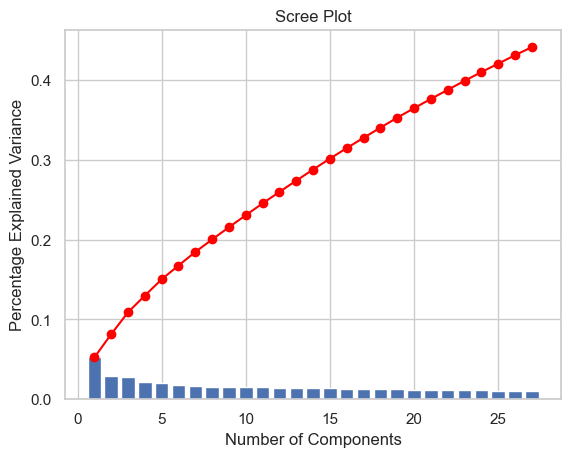

Number of Components that explains 85% of variance:
Coordinates (MCA equivalent of loadings):
            0         1         2         3         4         5         6   \
0     0.570644  0.039433 -0.038250 -0.377676  0.192703  0.114742 -0.131288   
1     0.660822 -0.052186 -0.069817 -0.461433  0.119603  0.067864 -0.036493   
2    -0.530950  0.504557 -0.065196 -0.328680 -0.163975 -0.430986  0.565974   
3     0.726934 -0.134449 -0.112956 -0.588239  0.192187  0.043087  0.043104   
4     0.699128  0.169159  0.136922  0.270044 -0.192244  0.048954 -0.206310   
...        ...       ...       ...       ...       ...       ...       ...   
1044  0.142206 -0.024903 -0.042309  0.287709  0.277340  0.578663  0.637518   
1045 -0.081702  0.036230 -0.036170 -0.119374 -0.133227  0.424273 -0.705219   
1046  0.518923  0.197728  0.072725  0.039604  0.331494  0.175951 -0.364581   
1047  0.323261  0.030487 -0.075686 -0.575810  0.174894 -0.086337  0.060716   
1048 -0.235219 -0.744049 -0.192630  0.211829 -0.

In [56]:
#Do the MCA
MCA = MultipleCorrespondenceAnalysis()
MCA.explain(data.select_dtypes(include = ['object']))

Using MCA does not capture the whole variance of the data. For this reason, we will just encode the data and pass it to the model

In [57]:
numeric = PCA.do(data.select_dtypes(exclude='object').drop(columns=['SalePrice']), n_components = 19, mode = 'train')
numericcol = data.select_dtypes(exclude='object').drop(columns = ['SalePrice']).columns
data = data.drop(columns = numericcol)
data = pd.concat([data,numeric],axis = 1)
data.info()

data = pd.concat([data, engineeredcatvar], axis = 1)
data = pd.get_dummies(data)
data.to_csv('trainpreprocessed.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1049 non-null   object 
 1   MSZoning       1049 non-null   object 
 2   LotShape       1049 non-null   object 
 3   LandContour    1049 non-null   object 
 4   LotConfig      1049 non-null   object 
 5   Neighborhood   1049 non-null   object 
 6   Condition1     1049 non-null   object 
 7   BldgType       1049 non-null   object 
 8   HouseStyle     1049 non-null   object 
 9   RoofStyle      1049 non-null   object 
 10  Exterior1st    1049 non-null   object 
 11  Exterior2nd    1049 non-null   object 
 12  MasVnrType     1049 non-null   object 
 13  ExterQual      1049 non-null   object 
 14  ExterCond      1049 non-null   object 
 15  Foundation     1049 non-null   object 
 16  BsmtQual       1049 non-null   object 
 17  BsmtExposure   1049 non-null   object 
 18  BsmtFinT

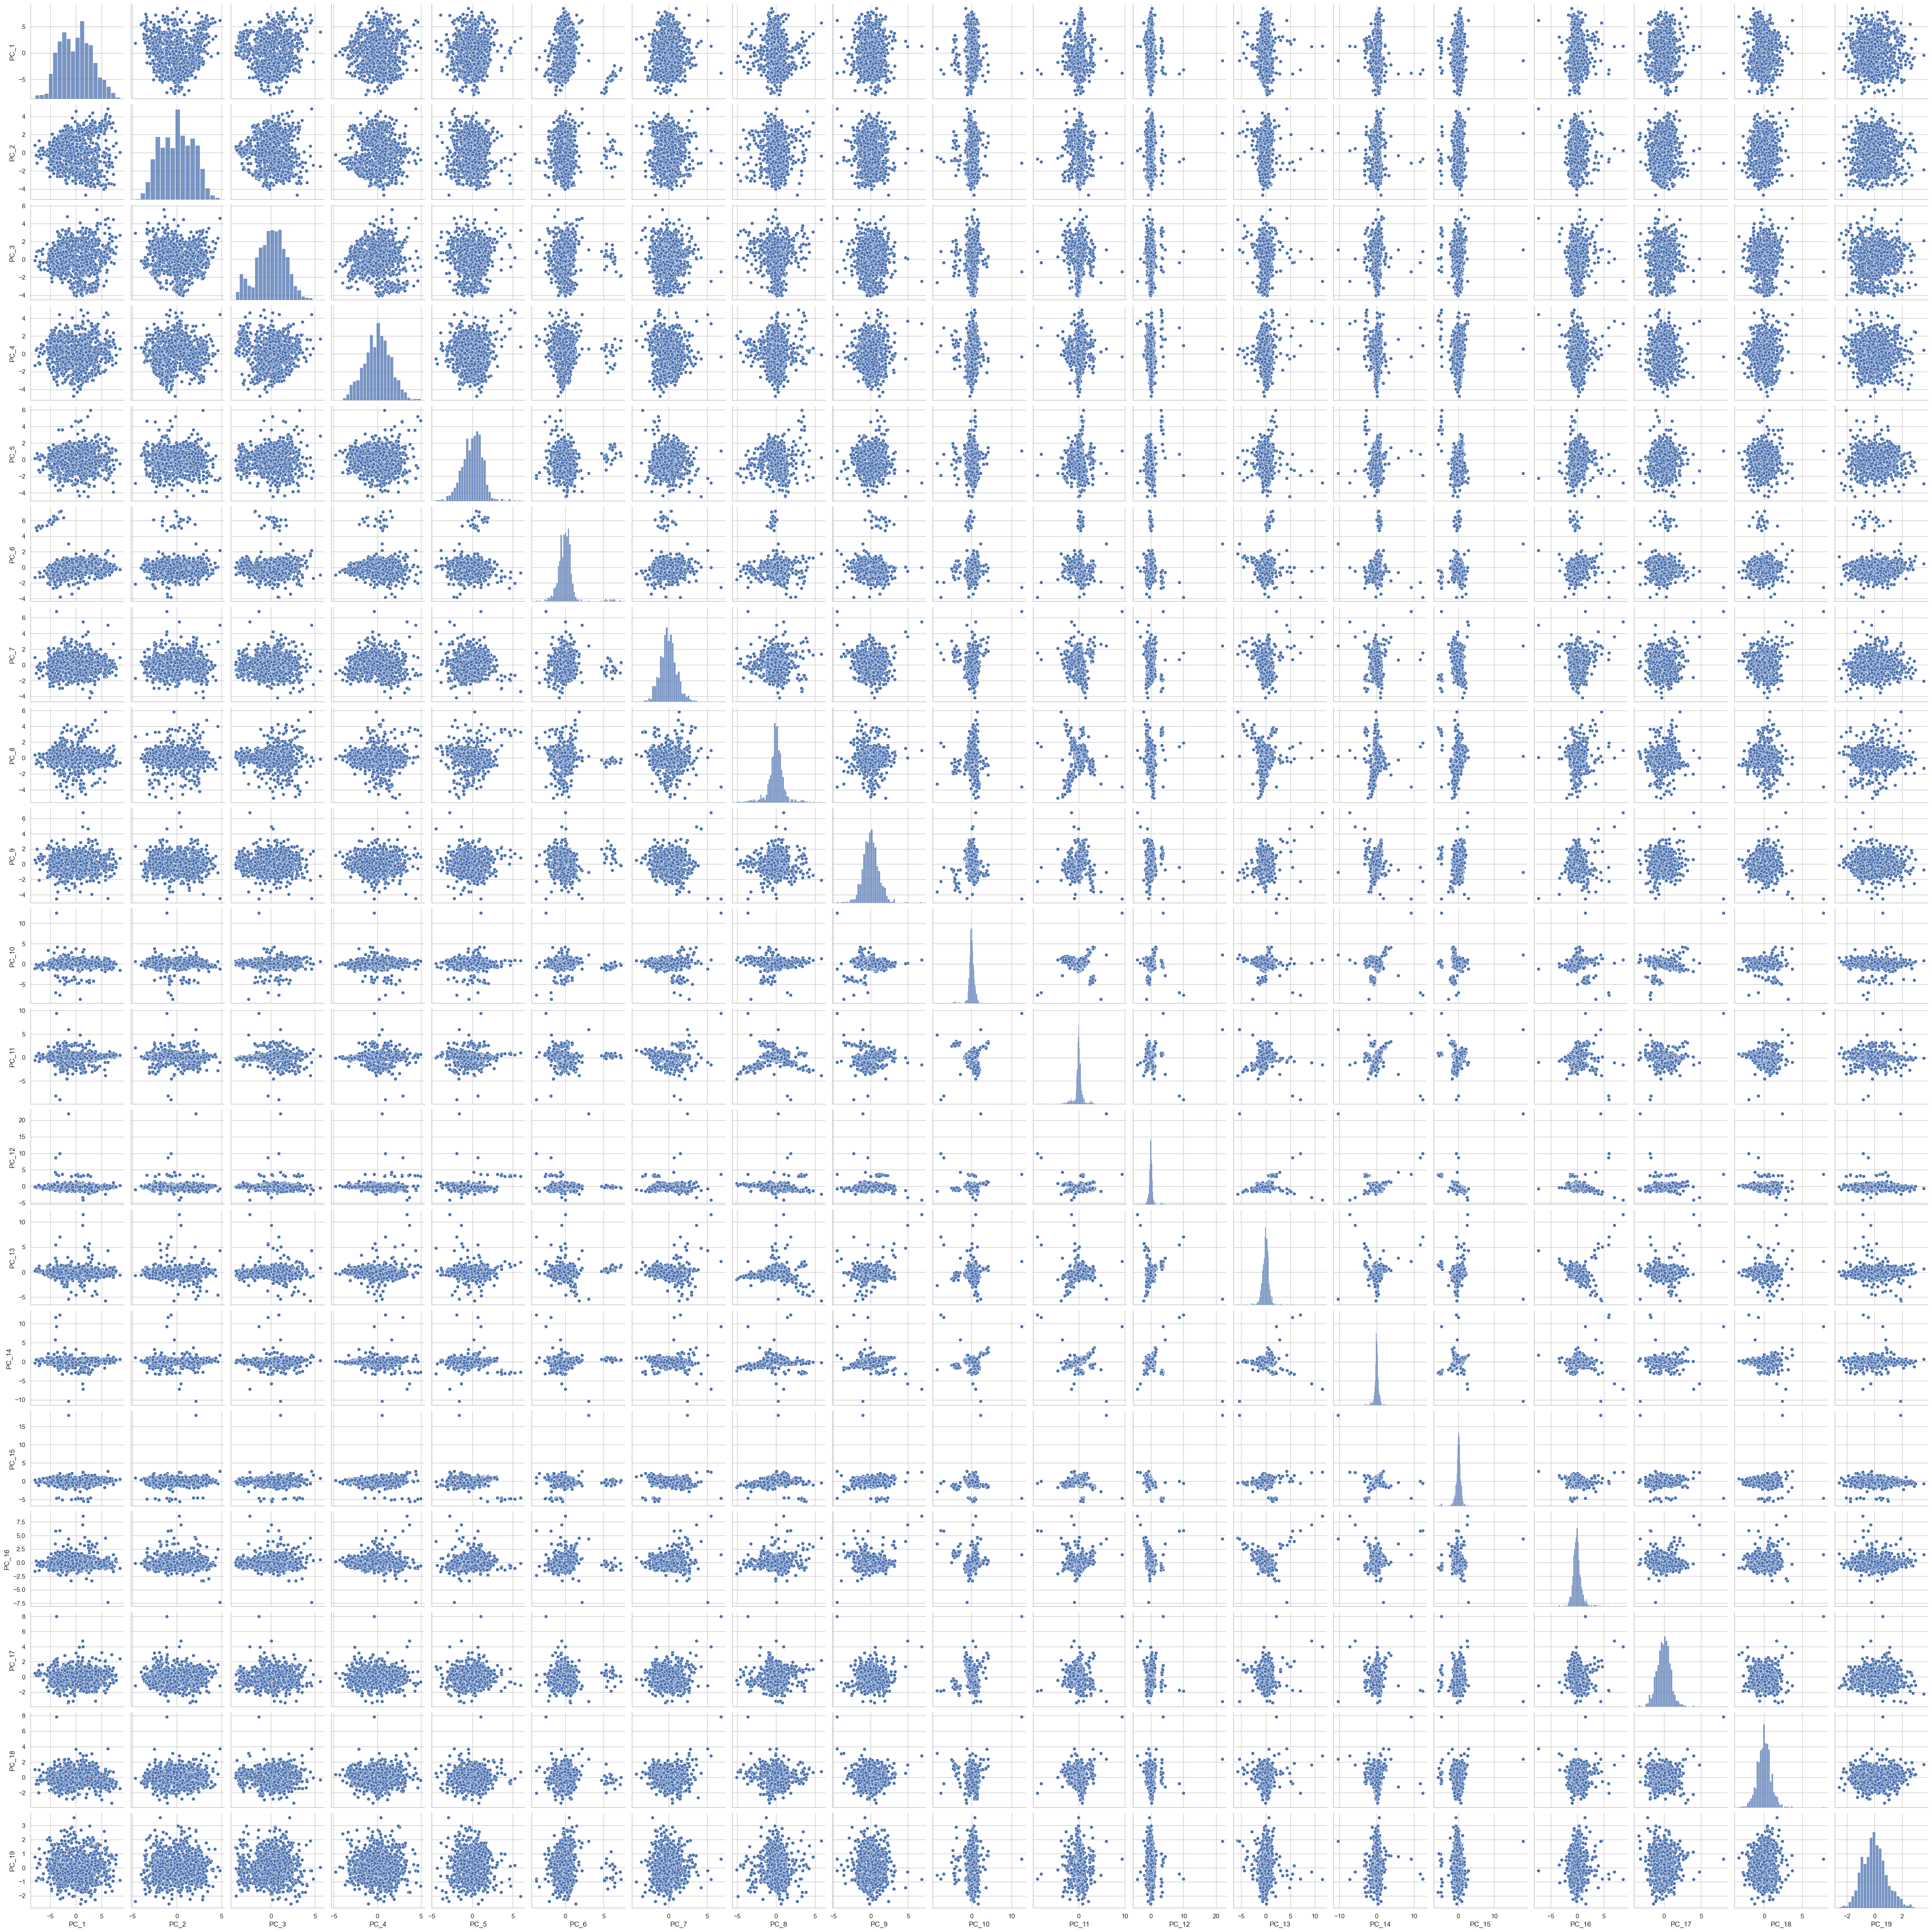

In [58]:
numericfeat = data[["PC_{}".format(i+1) for i in range(19)]] 
sns.pairplot(numericfeat)